## Importing Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [ ]:
#download the dataset and import manually rather than using gdrive which need authorization
df_zillow = pd.read_csv('/content/data_20240604.csv')

## Check Dataset

In [ ]:
df_zillow.sample(5)

,bathrooms,bedrooms,city,country,currency,daysOnZillow,homeStatus,homeStatusForHDP,homeType,imgSrc,...,newConstructionType,listing_sub_type.is_newHome,unit,group_type,priceSuffix,providerListingID,openHouse,listing_sub_type.is_openHouse,open_house_info.open_house_showing,videoCount
323,2.0,3.0,Houston,USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/fbe4f5e8413...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,3.0,4.0,Houston,USA,USD,1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/892ad673da4...,...,NaN,NaN,NaN,NaN,NaN,NaN,Sun. 1-3:30pm,True,"[{'open_house_end': 1717972200000, 'open_house...",NaN
475,4.0,5.0,Houston,USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/74c71f6205d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,0.0,NaN,Houston,USA,USD,-1,FOR_SALE,FOR_SALE,LOT,https://photos.zillowstatic.com/fp/17d01a2fbaa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,2.0,4.0,Houston,USA,USD,-1,FOR_SALE,FOR_SALE,SINGLE_FAMILY,https://photos.zillowstatic.com/fp/a1493c39af7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   bathrooms                           655 non-null    float64
 1   bedrooms                            589 non-null    float64
 2   city                                656 non-null    object 
 3   country                             656 non-null    object 
 4   currency                            656 non-null    object 
 5   daysOnZillow                        656 non-null    int64  
 6   homeStatus                          656 non-null    object 
 7   homeStatusForHDP                    656 non-null    object 
 8   homeType                            656 non-null    object 
 9   imgSrc                              656 non-null    object 
 10  isFeatured                          656 non-null    bool   
 11  isNonOwnerOccupied                  656 non-n

In [ ]:
df_zillow.columns

Index(['bathrooms', 'bedrooms', 'city', 'country', 'currency', 'daysOnZillow',
       'homeStatus', 'homeStatusForHDP', 'homeType', 'imgSrc', 'isFeatured',
       'isNonOwnerOccupied', 'isPreforeclosureAuction', 'isPremierBuilder',
       'isShowcaseListing', 'isUnmappable', 'isZillowOwned', 'latitude',
       'livingArea', 'longitude', 'lotAreaUnit', 'lotAreaValue', 'price',
       'priceForHDP', 'rentZestimate', 'shouldHighlight', 'state',
       'streetAddress', 'taxAssessedValue', 'timeOnZillow', 'zestimate',
       'zipcode', 'zpid', 'listing_sub_type.is_FSBA',
       'listing_sub_type.is_bankOwned', 'datePriceChanged', 'priceChange',
       'priceReduction', 'newConstructionType', 'listing_sub_type.is_newHome',
       'unit', 'group_type', 'priceSuffix', 'providerListingID', 'openHouse',
       'listing_sub_type.is_openHouse', 'open_house_info.open_house_showing',
       'videoCount'],
      dtype='object')

In [ ]:
custom_columns = ['city', 'country', 'homeType', 'state']
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_zillow[column].value_counts())
    print()

============= city =================


,count
city,
Houston,632
Humble,10
Kingwood,10
Huffman,1
Texas City,1
Webster,1
Katy,1



============= country =================


,count
country,
USA,656



============= homeType =================


,count
homeType,
SINGLE_FAMILY,433
CONDO,74
LOT,65
TOWNHOUSE,62
MULTI_FAMILY,22



============= state =================


,count
state,
TX,656


In [ ]:
df_houston = df_zillow[df_zillow['city'] == 'Houston']

In [ ]:
df_houston.describe()

,bathrooms,bedrooms,daysOnZillow,latitude,livingArea,longitude,lotAreaValue,price,priceForHDP,rentZestimate,taxAssessedValue,timeOnZillow,zestimate,zipcode,zpid,datePriceChanged,priceChange,providerListingID,videoCount
count,632.000000,568.000000,632.000000,632.000000,566.000000,632.000000,577.000000,6.320000e+02,6.320000e+02,588.000000,5.130000e+02,6.320000e+02,5.130000e+02,632.000000,6.320000e+02,1.240000e+02,124.000000,1.500000e+01,6.0
mean,2.482595,3.109155,0.055380,29.780133,2082.618375,-95.429507,4221.835251,4.628358e+05,4.628358e+05,2719.299320,3.613386e+05,1.968555e+08,4.590803e+05,77050.093354,2.834832e+08,1.714403e+12,-9600.943548,2.559708e+07,1.0
std,1.333352,0.938339,1.668702,0.098489,1002.702147,0.131984,3212.312389,5.397252e+05,5.397252e+05,2436.121377,3.784165e+05,1.182621e+08,4.959848e+05,28.977599,5.932668e+08,7.184532e+09,51269.161302,1.044614e+07,0.0
min,0.000000,0.000000,-1.000000,29.545023,480.000000,-95.713510,0.000000,1.050000e+03,1.050000e+03,361.000000,1.095000e+04,2.131000e+06,4.880000e+04,77002.000000,2.757911e+07,1.664435e+12,-300000.000000,9.312000e+03,1.0
25%,2.000000,3.000000,-1.000000,29.720954,1434.750000,-95.512610,1412.000000,2.200000e+05,2.200000e+05,1650.000000,1.811310e+05,5.577025e+07,2.348000e+05,77022.750000,2.810075e+07,1.715044e+12,-20000.000000,2.890056e+07,1.0
50%,2.000000,3.000000,-1.000000,29.781039,1849.000000,-95.425674,4599.936000,3.190000e+05,3.190000e+05,2100.000000,2.643330e+05,2.220730e+08,3.202000e+05,77051.000000,2.844796e+07,1.717139e+12,-8500.000000,2.986883e+07,1.0
75%,3.000000,4.000000,0.000000,29.845140,2470.500000,-95.358015,7001.000000,4.858500e+05,4.858500e+05,2798.250000,4.007680e+05,2.964375e+08,4.750000e+05,77077.000000,1.613753e+08,1.717247e+12,-997.500000,3.009194e+07,1.0
max,8.000000,6.000000,4.000000,30.027050,7794.000000,-95.075134,10881.288000,5.850000e+06,5.850000e+06,25050.000000,3.974937e+06,3.684500e+08,5.160000e+06,77099.000000,2.144636e+09,1.717484e+12,278000.000000,3.032732e+07,1.0


## Exploratory Data Analysis (EDA)

In [ ]:
# Shuffle data to prevent unseen label
df_houston= df_houston.sample(frac=1, random_state=42).reset_index(drop=True)

### Feature Relationship

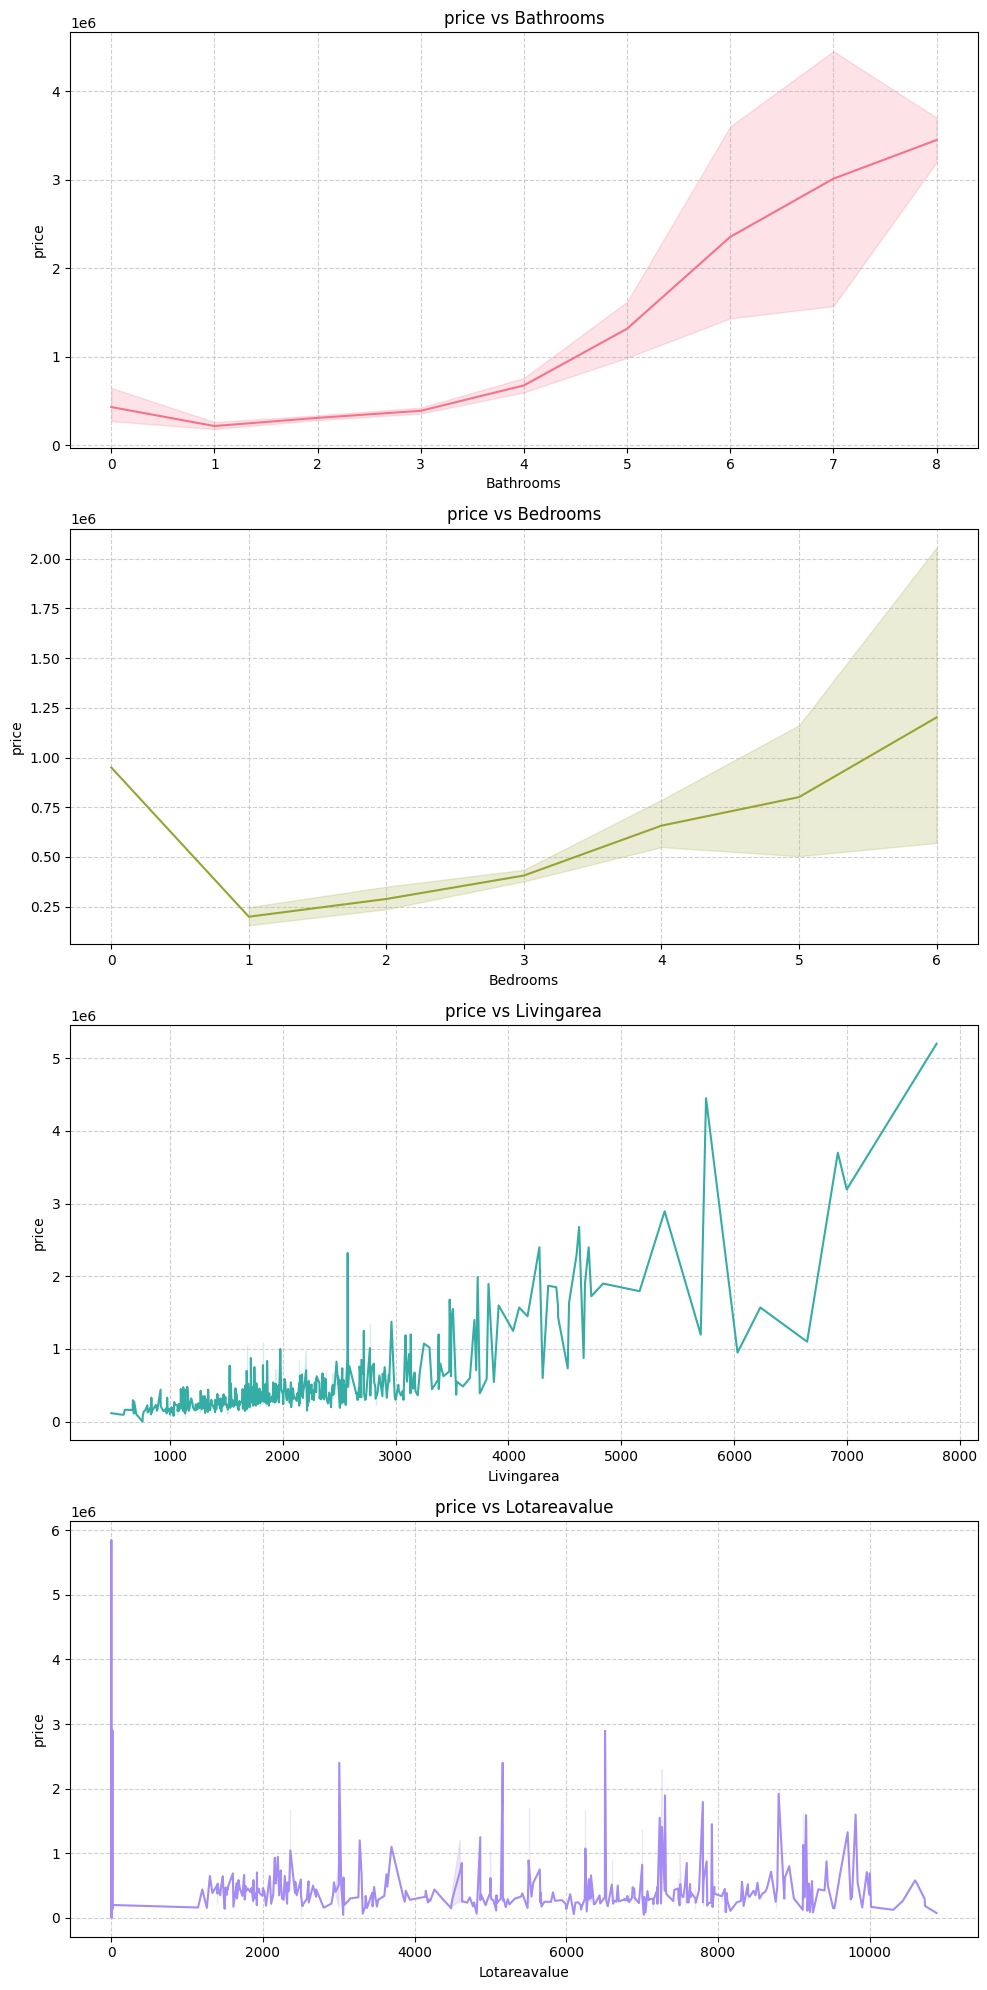

In [ ]:
X_feature = ['bathrooms', 'bedrooms', 'livingArea', 'lotAreaValue']

fig, ax = plt.subplots(4, 1, figsize=(10, 20))

# Set a color palette for the plots
colors = sns.color_palette("husl", len(X_feature))

for i, feature in enumerate(X_feature):

    # Create a line plot for each feature against 'price'
    sns.lineplot(data=df_houston, x=feature, y='price', ax=ax[i], color=colors[i])

    # Set labels and title for each subplot
    ax[i].set_xlabel(feature.capitalize())  # Capitalize the feature name for better readability
    ax[i].set_ylabel('price')
    ax[i].set_title(f'price vs {feature.capitalize()}')

    # Add grid for better visualization
    ax[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Plot Distribution and Box Plot

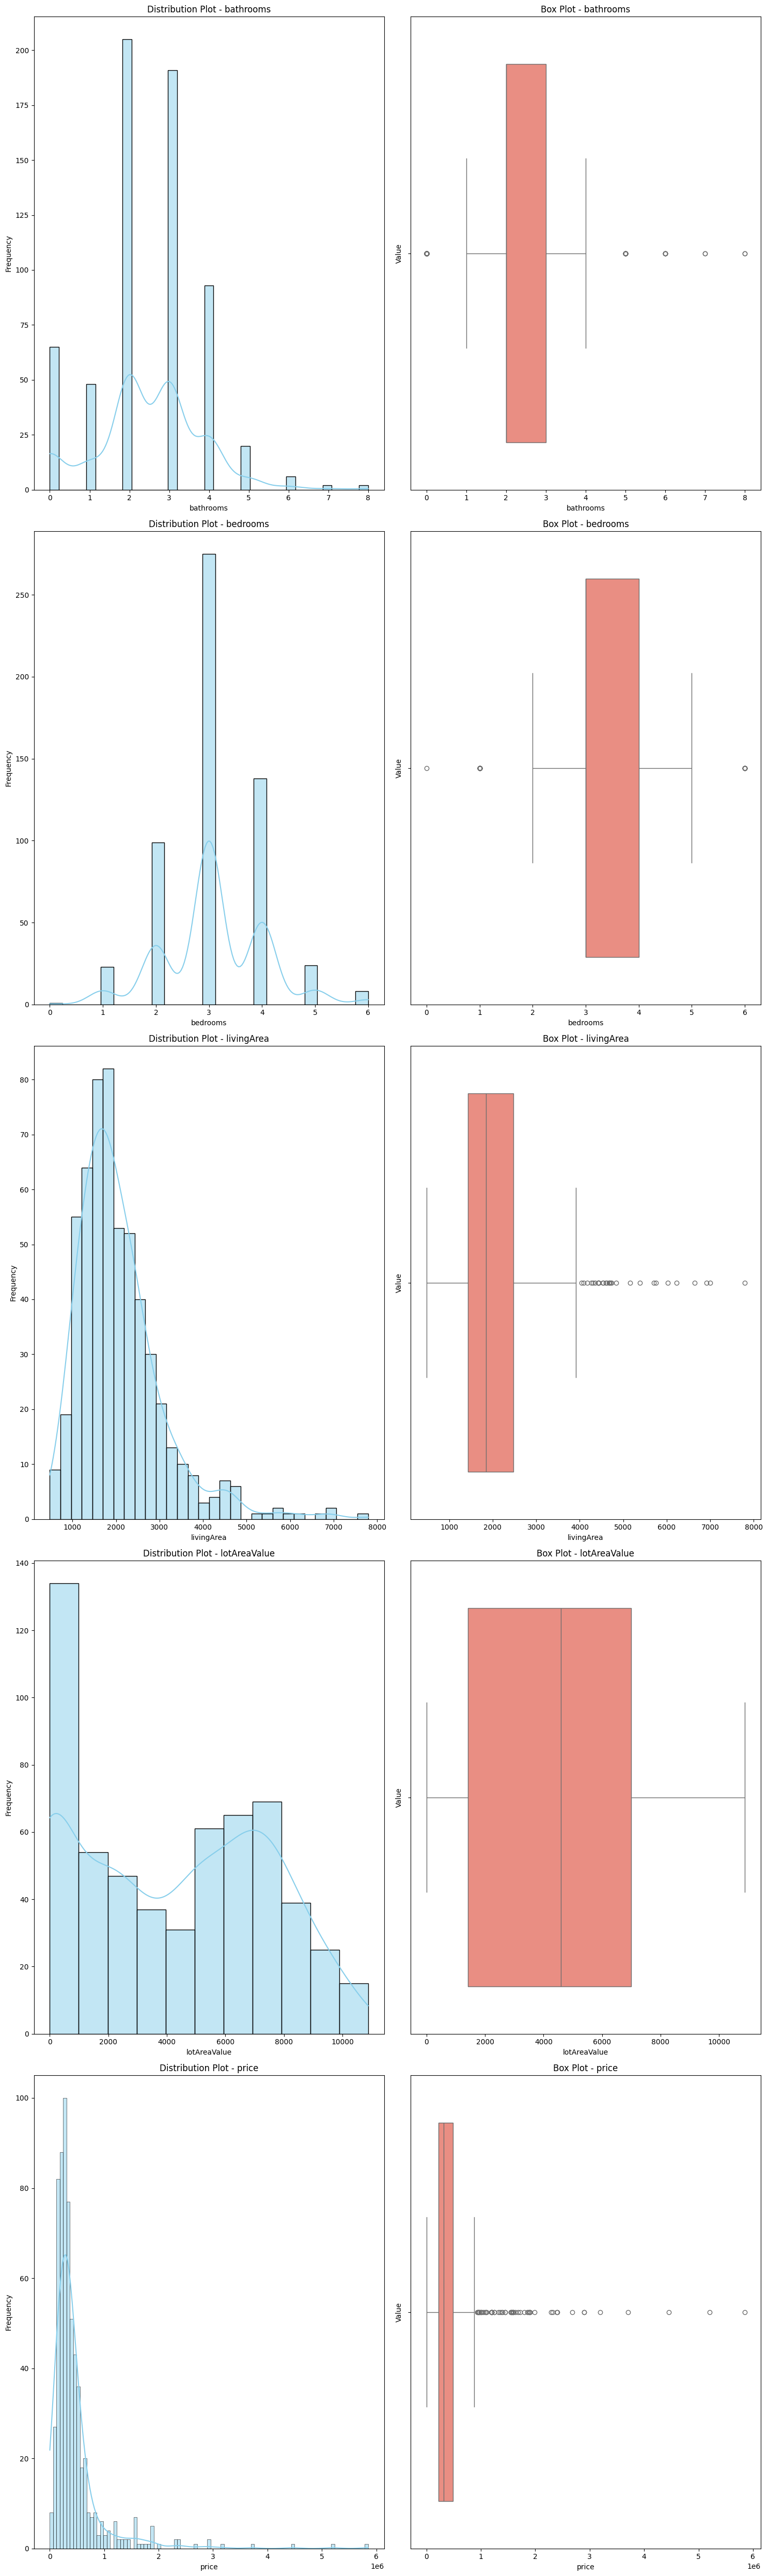

In [ ]:
features = ['bathrooms', 'bedrooms', 'livingArea', 'lotAreaValue', 'price']

fig, ax = plt.subplots(len(features), 2, figsize=(15, 50))

for idx, column in enumerate(features):
    # Distribution Plot
    sns.histplot(
        x=df_houston[features[idx]],
        color='skyblue',
        kde=True,
        ax=ax[idx][0]
    )
    ax[idx][0].set_title(f'Distribution Plot - {column}')
    ax[idx][0].set_xlabel(column)
    ax[idx][0].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(
        x=df_houston[features[idx]],
        color='salmon',
        ax=ax[idx][1]
    )
    ax[idx][1].set_title(f'Box Plot - {column}')
    ax[idx][1].set_xlabel(column)
    ax[idx][1].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Feature Engineering

### Remove Duplicates

In [ ]:
print(f"Dataframe dimension before duplication drop {df_houston.shape[0]}")

df_houston.drop_duplicates().reset_index(drop=True, inplace=True)

print(f"Dataframe dimension after duplication drop {df_houston.shape[0]}")

Dataframe dimension before duplication drop 632
Dataframe dimension after duplication drop 632


### Standardized Column

In [ ]:
# function to convert acres -> sqft
def convert_to_sqft(row):
    if row['lotAreaUnit'] == 'acres':
        return row['lotAreaValue'] * 43560
    else:
        return row['lotAreaValue']

In [ ]:
df_houston['lotAreaValue_sqft'] = df_houston.apply(convert_to_sqft, axis=1)

### Splitting Dataset

In [ ]:
train_houston, test_houston = train_test_split(df_houston, test_size=0.2, random_state=42)

### Encoding : Label Encoder

In [ ]:
columns_to_encode = ['homeType']

In [ ]:
# initiating label encoder
label_encoder = LabelEncoder()

In [ ]:
# train_houston label encoder
for column in columns_to_encode:
    train_houston[column] = label_encoder.fit_transform(train_houston[column])

In [ ]:
# test_houston label encoder using transform to keep data integrity
for column in columns_to_encode:
    test_houston[column] = label_encoder.transform(test_houston[column])

### Selecting Column

In [ ]:
train_houston = train_houston[['bathrooms', 'bedrooms', 'homeType', 'livingArea', 'lotAreaValue_sqft', 'price']]
test_houston = test_houston[['bathrooms', 'bedrooms', 'homeType', 'livingArea', 'lotAreaValue_sqft', 'price']]

In [ ]:
train_houston.describe()

,bathrooms,bedrooms,homeType,livingArea,lotAreaValue_sqft,price
count,505.000000,454.000000,505.000000,452.000000,462.000000,5.050000e+02
mean,2.499010,3.092511,2.572277,2096.504425,29661.702883,4.667665e+05
std,1.343894,0.901452,1.115913,996.096475,84670.399501,5.642079e+05
min,0.000000,1.000000,0.000000,480.000000,1144.000000,1.050000e+03
25%,2.000000,3.000000,3.000000,1470.000000,3871.096000,2.200000e+05
50%,3.000000,3.000000,3.000000,1852.000000,6799.716000,3.249000e+05
75%,3.000000,4.000000,3.000000,2452.500000,9738.796000,4.890000e+05
max,8.000000,6.000000,4.000000,7794.000000,677040.012000,5.850000e+06


In [ ]:
test_houston.describe()

,bathrooms,bedrooms,homeType,livingArea,lotAreaValue_sqft,price
count,127.000000,114.000000,127.000000,114.000000,115.000000,1.270000e+02
mean,2.417323,3.175439,2.299213,2027.561404,46720.637322,4.472056e+05
std,1.293702,1.074611,1.286776,1031.104477,114703.708763,4.303467e+05
min,0.000000,0.000000,0.000000,669.000000,0.000000,5.200000e+04
25%,2.000000,3.000000,1.000000,1228.750000,4937.182000,2.200000e+05
50%,2.000000,3.000000,3.000000,1834.500000,7474.896000,2.950000e+05
75%,3.000000,4.000000,3.000000,2493.250000,12371.040000,4.744500e+05
max,6.000000,6.000000,4.000000,6030.000000,651222.000000,2.900000e+06


### Missing Value Handling

In [ ]:
columns_to_fill = ['bedrooms', 'livingArea', 'lotAreaValue_sqft']

train_houston[columns_to_fill] = train_houston[columns_to_fill].fillna(-1)
test_houston[columns_to_fill] = test_houston[columns_to_fill].fillna(-1)

In [ ]:
# since the missing value is numeric type, we use median method
median_bedrooms = train_houston[train_houston['bedrooms'] != -1]['bedrooms'].median()
median_livingArea = train_houston[train_houston['livingArea'] != -1]['livingArea'].median()
median_lotAreaValue = train_houston[train_houston['lotAreaValue_sqft'] != -1]['lotAreaValue_sqft'].median()

In [ ]:
# implement missing value imputation to train with median
train_houston['bedrooms'] = train_houston['bedrooms'].apply(lambda x: median_bedrooms if x == -1 else x)
train_houston['livingArea'] = train_houston['livingArea'].apply(lambda x: median_livingArea if x == -1 else x)
train_houston['lotAreaValue_sqft'] = train_houston['lotAreaValue_sqft'].apply(lambda x: median_lotAreaValue if x == -1 else x)

In [ ]:
train_houston.describe()

,bathrooms,bedrooms,homeType,livingArea,lotAreaValue_sqft,price
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,2.499010,3.083168,2.572277,2070.843564,27715.038653,4.667665e+05
std,1.343894,0.855082,1.115913,945.249010,81229.459199,5.642079e+05
min,0.000000,1.000000,0.000000,480.000000,1144.000000,1.050000e+03
25%,2.000000,3.000000,3.000000,1512.000000,4499.748000,2.200000e+05
50%,3.000000,3.000000,3.000000,1852.000000,6799.716000,3.249000e+05
75%,3.000000,4.000000,3.000000,2384.000000,9138.888000,4.890000e+05
max,8.000000,6.000000,4.000000,7794.000000,677040.012000,5.850000e+06


In [ ]:
# implement missing value imputation to test with median from train_houston to prevent leakage
test_houston['bedrooms'] = test_houston['bedrooms'].apply(lambda x: median_bedrooms if x == -1 else x)
test_houston['livingArea'] = test_houston['livingArea'].apply(lambda x: median_livingArea if x == -1 else x)
test_houston['lotAreaValue_sqft'] = test_houston['lotAreaValue_sqft'].apply(lambda x: median_lotAreaValue if x == -1 else x)

In [ ]:
test_houston.describe()

,bathrooms,bedrooms,homeType,livingArea,lotAreaValue_sqft,price
count,127.000000,127.000000,127.000000,127.000000,127.000000,1.270000e+02
mean,2.417323,3.157480,2.299213,2009.590551,42948.581764,4.472056e+05
std,1.293702,1.019066,1.286776,977.925431,109733.023924,4.303467e+05
min,0.000000,0.000000,0.000000,669.000000,0.000000,5.200000e+04
25%,2.000000,3.000000,1.000000,1258.000000,5020.290000,2.200000e+05
50%,2.000000,3.000000,3.000000,1852.000000,6900.000000,2.950000e+05
75%,3.000000,4.000000,3.000000,2367.500000,11223.234000,4.744500e+05
max,6.000000,6.000000,4.000000,6030.000000,651222.000000,2.900000e+06


## Feature Scalling

### Normalized : Min-Max Scaller

In [ ]:
columns_to_normalized = ['bathrooms', 'bedrooms', 'homeType', 'livingArea', 'lotAreaValue_sqft', 'price']
new_normalized = ['bathrooms_minmax', 'bedrooms_minmax', 'homeType_minmax', 'livingArea_minmax', 'lotAreaValue_sqft_minmax', 'price_minmax']

In [ ]:
# initiate the minmax scaller
minmax = MinMaxScaler()

In [ ]:
# Fit MinMaxScaler on training data
minmax.fit(train_houston[columns_to_normalized])

# Apply transformation on training data
train_houston[new_normalized] = minmax.transform(train_houston[columns_to_normalized])

# Apply transformation on test data
test_houston[new_normalized] = minmax.transform(test_houston[columns_to_normalized])

### Plot Distribution

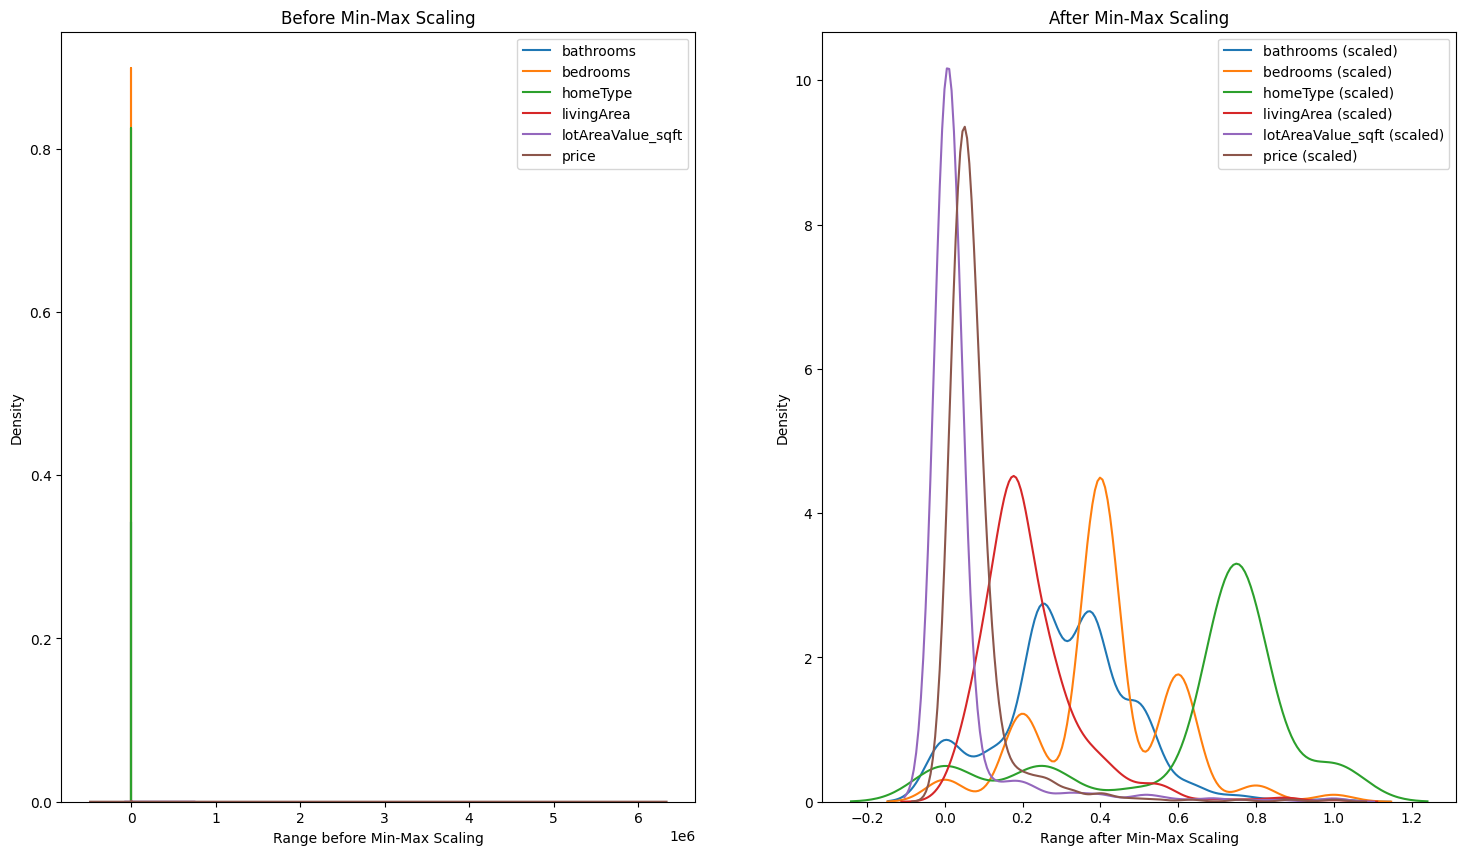

In [ ]:
# plot the differences before-after minmax scaler implementation (overview)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 10))

# Plot distribution before min-max
ax1.set_title('Before Min-Max Scaling')
sns.kdeplot(train_houston['bathrooms'], ax=ax1, label='bathrooms')
sns.kdeplot(train_houston['bedrooms'], ax=ax1, label='bedrooms')
sns.kdeplot(train_houston['homeType'], ax=ax1, label='homeType')
sns.kdeplot(train_houston['livingArea'], ax=ax1, label='livingArea')
sns.kdeplot(train_houston['lotAreaValue_sqft'], ax=ax1, label='lotAreaValue_sqft')
sns.kdeplot(train_houston['price'], ax=ax1, label='price')

# Plot distribution after min-max
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(train_houston['bathrooms_minmax'], ax=ax2, label='bathrooms (scaled)')
sns.kdeplot(train_houston['bedrooms_minmax'], ax=ax2, label='bedrooms (scaled)')
sns.kdeplot(train_houston['homeType_minmax'], ax=ax2, label='homeType (scaled)')
sns.kdeplot(train_houston['livingArea_minmax'], ax=ax2, label='livingArea (scaled)')
sns.kdeplot(train_houston['lotAreaValue_sqft_minmax'], ax=ax2, label='lotAreaValue_sqft (scaled)')
sns.kdeplot(train_houston['price_minmax'], ax=ax2, label='price (scaled)')

# Set x-labels
ax1.set_xlabel('Range before Min-Max Scaling')
ax2.set_xlabel('Range after Min-Max Scaling')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

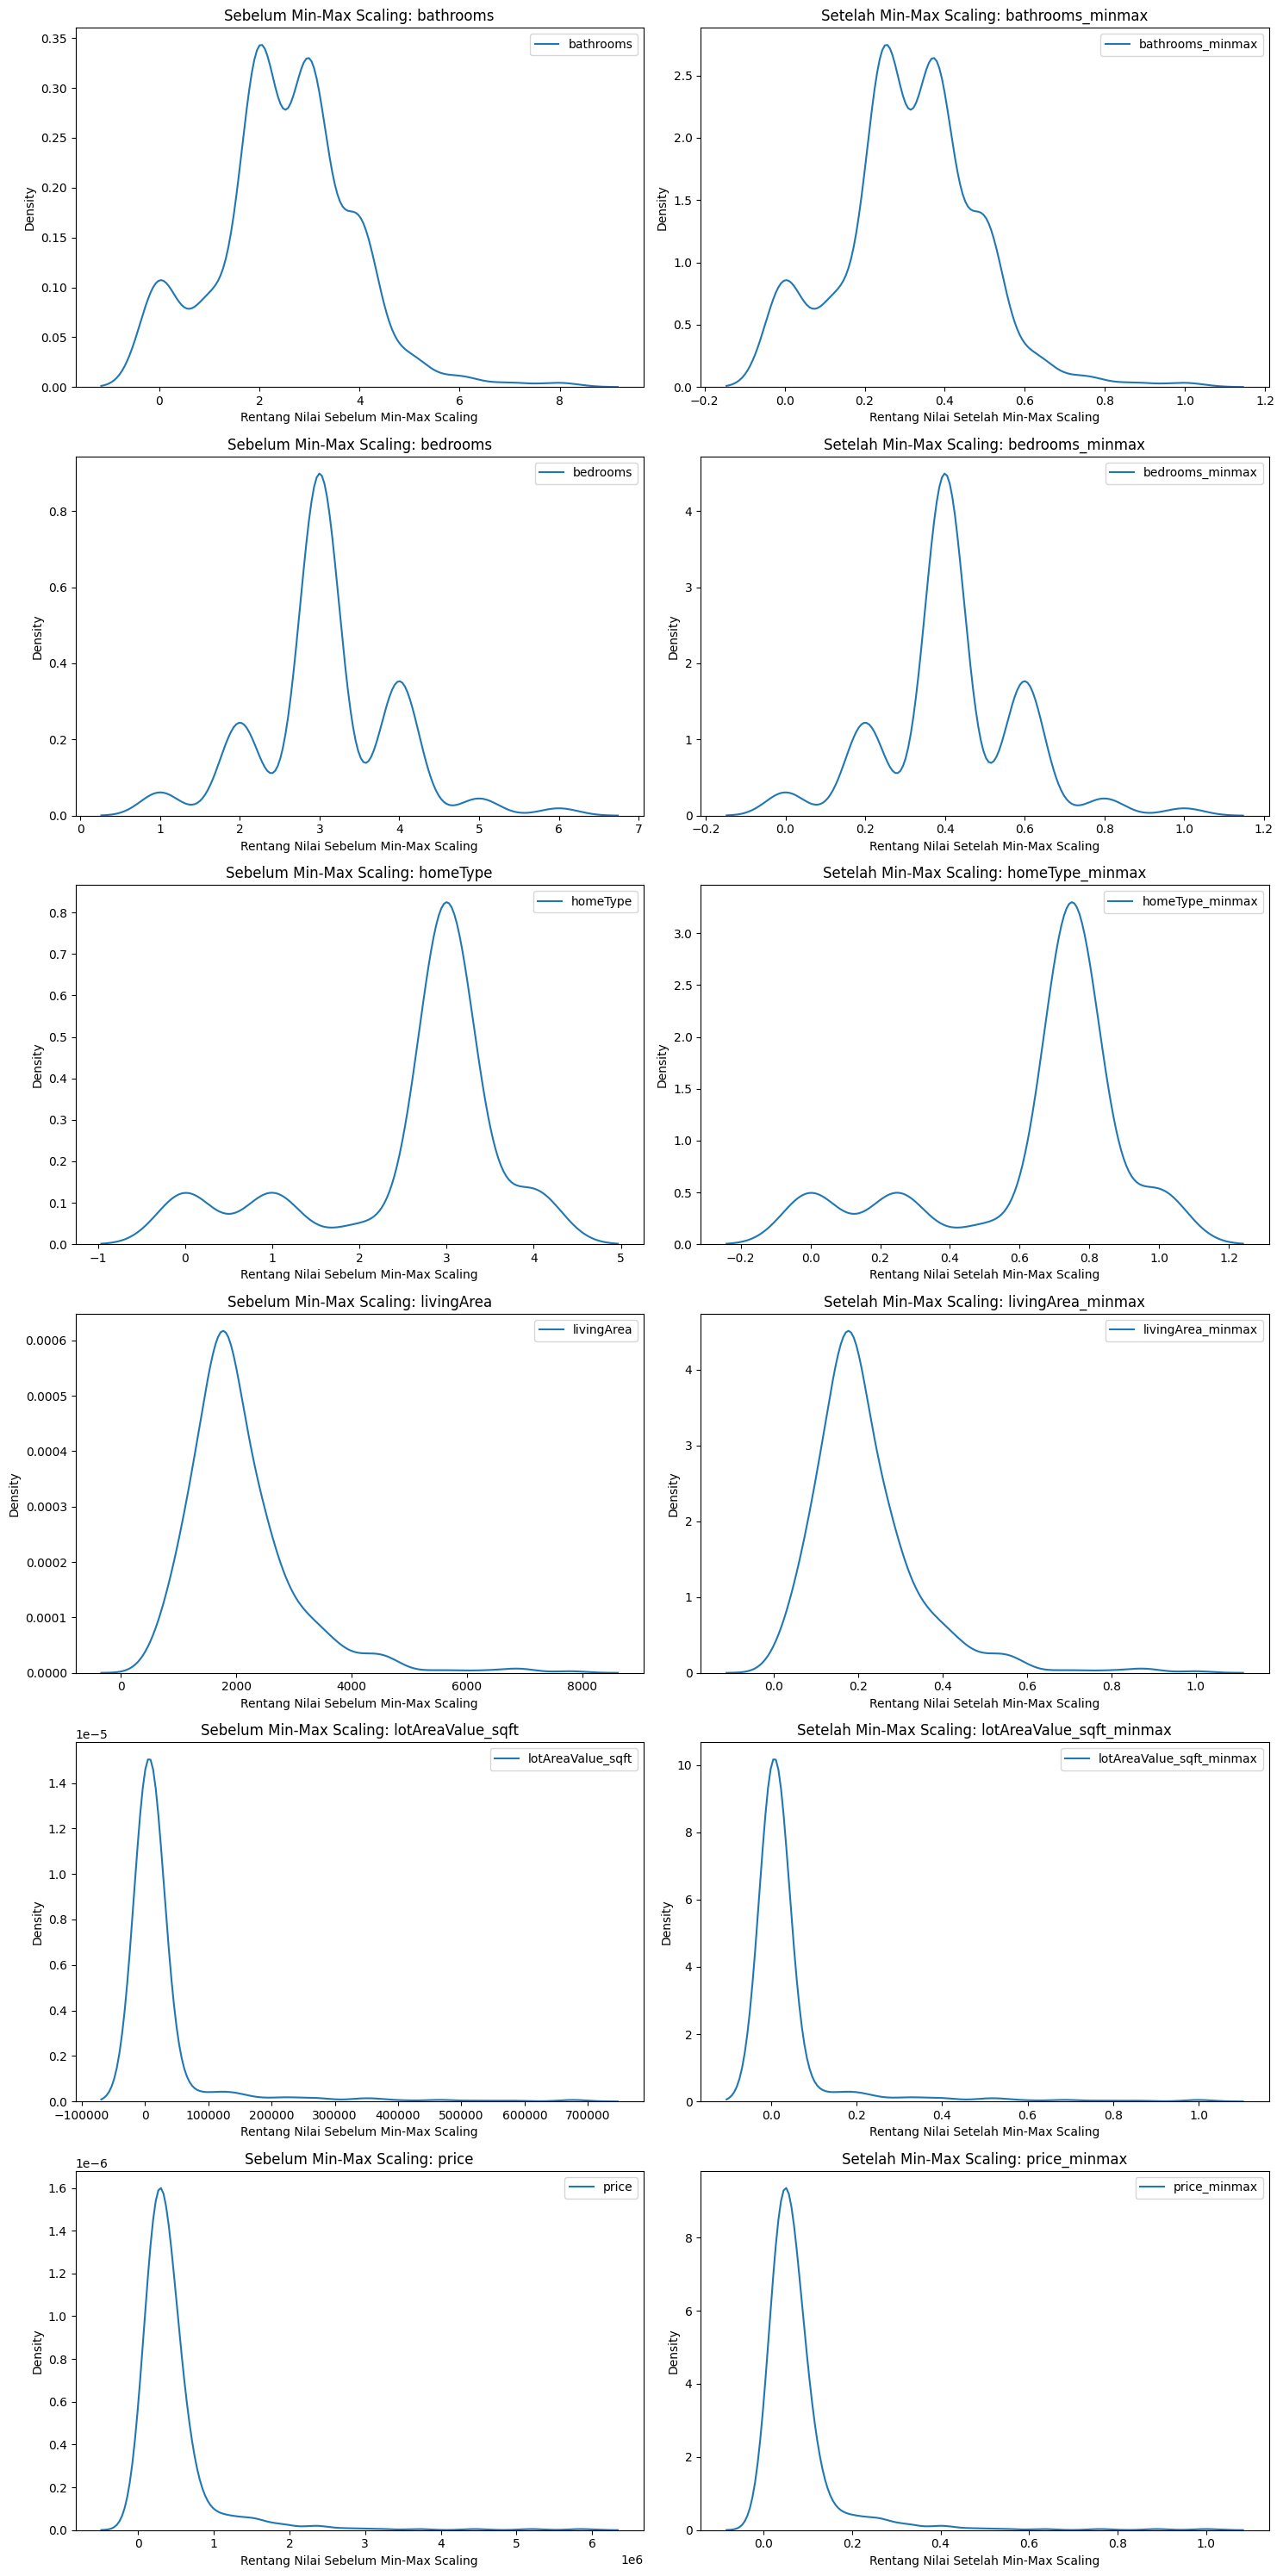

In [ ]:
# plot the differences before-after minmax scaler implementation (each columns)
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to be normalized and their corresponding new column names
columns_to_normalized = ['bathrooms', 'bedrooms', 'homeType', 'livingArea', 'lotAreaValue_sqft', 'price']
new_normalized = ['bathrooms_minmax', 'bedrooms_minmax', 'homeType_minmax', 'livingArea_minmax', 'lotAreaValue_sqft_minmax', 'price_minmax']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns_to_normalized), ncols=2, figsize=(15, 30))

for i, (col, new_col) in enumerate(zip(columns_to_normalized, new_normalized)):
    # Plot distribution before Min-Max Scaling
    sns.kdeplot(train_houston[col], ax=axes[i, 0], label=col)
    axes[i, 0].set_title(f'Sebelum Min-Max Scaling: {col}')
    axes[i, 0].set_xlabel('Rentang Nilai Sebelum Min-Max Scaling')
    axes[i, 0].legend()

    # Plot distribution after Min-Max Scaling
    sns.kdeplot(train_houston[new_col], ax=axes[i, 1], label=new_col)
    axes[i, 1].set_title(f'Setelah Min-Max Scaling: {new_col}')
    axes[i, 1].set_xlabel('Rentang Nilai Setelah Min-Max Scaling')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
train_houston[new_normalized].describe()

,bathrooms_minmax,bedrooms_minmax,homeType_minmax,livingArea_minmax,lotAreaValue_sqft_minmax,price_minmax
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.312376,0.416634,0.643069,0.217507,0.039312,0.079624
std,0.167987,0.171016,0.278978,0.129238,0.120180,0.096463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.750000,0.141099,0.004965,0.037434
50%,0.375000,0.400000,0.750000,0.187585,0.008368,0.055369
75%,0.375000,0.600000,0.750000,0.260323,0.011829,0.083425
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_houston[new_normalized].describe()

,bathrooms_minmax,bedrooms_minmax,homeType_minmax,livingArea_minmax,lotAreaValue_sqft_minmax,price_minmax
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.302165,0.431496,0.574803,0.209132,0.061851,0.076280
std,0.161713,0.203813,0.321694,0.133706,0.162352,0.073577
min,0.000000,-0.200000,0.000000,0.025841,-0.001693,0.008711
25%,0.250000,0.400000,0.250000,0.106371,0.005735,0.037434
50%,0.250000,0.400000,0.750000,0.187585,0.008516,0.050257
75%,0.375000,0.600000,0.750000,0.258067,0.014912,0.080938
max,0.750000,1.000000,1.000000,0.758819,0.961802,0.495636


## Modelling - Machine Learning

In [ ]:
X_train = train_houston[new_normalized].drop('price_minmax', axis = 1)
X_test = test_houston[new_normalized].drop('price_minmax', axis = 1)
y_train = train_houston[['price_minmax']]
y_test = test_houston[['price_minmax']]

#### Initiate Model

In [ ]:
# initiate Linear Regression model
LinearRegression = LinearRegression()

# initiate Ridge Regression model
RidgeRegression = Ridge()

# initiate Lasso Regression model
LassoRegression = Lasso()

# Initiate Decision Tree Regressor model
decision_tree_regressor = DecisionTreeRegressor()

# Initiate Random Forest Regressor model
random_forest_regressor = RandomForestRegressor()

# Initiate Gradient Boosting Regressor model
gradient_boosting_regressor = GradientBoostingRegressor()

In [ ]:
LinearRegression.fit(X_train, y_train)
RidgeRegression.fit(X_train, y_train)
LassoRegression.fit(X_train, y_train)
decision_tree_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)
gradient_boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_Linear = LinearRegression.predict(X_test)
y_pred_Ridge = RidgeRegression.predict(X_test)
y_pred_Lasso = LassoRegression.predict(X_test)
y_pred_decision = decision_tree_regressor.predict(X_test)
y_pred_random = random_forest_regressor.predict(X_test)
y_pred_gradient = gradient_boosting_regressor.predict(X_test)

#### Evaluation Model

In [ ]:
print('Linear Regression Metrics:')
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_Linear))))
print('R-squared: {:.2f}%'.format(r2_score(y_test, y_pred_Linear) * 100))
print('MAE: {:.4f}'.format(mean_absolute_error(y_test, y_pred_Linear)))
print('----')
print('')
print('Ridge Regression Metrics:')
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_Ridge))))
print('R-squared: {:.2f}%'.format(r2_score(y_test, y_pred_Ridge) * 100))
print('MAE: {:.4f}'.format(mean_absolute_error(y_test, y_pred_Ridge)))
print('----')
print('')
print('Lasso Regression Metrics:')
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_Lasso))))
print('R-squared: {:.2f}%'.format(r2_score(y_test, y_pred_Lasso) * 100))
print('MAE: {:.4f}'.format(mean_absolute_error(y_test, y_pred_Lasso)))
print('----')
print('')
print('Decision Tree Regressor Metrics:')
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_decision))))
print('R-squared: {:.2f}%'.format(r2_score(y_test, y_pred_decision) * 100))
print('MAE: {:.4f}'.format(mean_absolute_error(y_test, y_pred_decision)))
print('----')
print('')
print('Random Forest Regressor Metrics:')
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_random))))
print('R-squared: {:.2f}%'.format(r2_score(y_test, y_pred_random) * 100))
print('MAE: {:.4f}'.format(mean_absolute_error(y_test, y_pred_random)))
print('----')
print('')
print('Gradient Boosting Regressor Metrics:')
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_gradient))))
print('R-squared: {:.2f}%'.format(r2_score(y_test, y_pred_gradient) * 100))
print('MAE: {:.4f}'.format(mean_absolute_error(y_test, y_pred_gradient)))

Linear Regression Metrics:
RMSE: 0.0627
R-squared: 26.73%
MAE: 0.0369
----

Ridge Regression Metrics:
RMSE: 0.0604
R-squared: 32.11%
MAE: 0.0361
----

Lasso Regression Metrics:
RMSE: 0.0734
R-squared: -0.21%
MAE: 0.0503
----

Decision Tree Regressor Metrics:
RMSE: 0.1047
R-squared: -104.20%
MAE: 0.0383
----

Random Forest Regressor Metrics:
RMSE: 0.0826
R-squared: -26.98%
MAE: 0.0355
----

Gradient Boosting Regressor Metrics:
RMSE: 0.1085
R-squared: -119.28%
MAE: 0.0396


#### Hyperparameter Model using gridsearchcv

##### Linear Regression

In [ ]:
param_grid = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "n_jobs": [None, -1],
    "positive": [True, False]
}

# Initialize KFold cross-validation = 5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search_LR_RR = GridSearchCV(estimator=LinearRegression,
                                  param_grid=param_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=kfold)

# Fit GridSearchCV to the data
grid_search_LR_RR.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search_LR_RR.best_estimator_
best_params = grid_search_LR_RR.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print('-----------------------------------------------')

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("RMSE: {:.4f}".format(round(rmse,4)))
print("R-squared: {:.2f}%".format(round(r2*100,2)))
print("MAE: {:.4f}".format(round(mae,4)))

Best Model: LinearRegression(fit_intercept=False)
Best Parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}
-----------------------------------------------
RMSE: 0.0629
R-squared: 26.44%
MAE: 0.0370


In [ ]:
param_grid = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "n_jobs": [None, -1],
    "positive": [True, False]
}

# Initialize KFold cross-validation = 2
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search_LR_RR = GridSearchCV(estimator=LinearRegression,
                                  param_grid=param_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=kfold)

# Fit GridSearchCV to the data
grid_search_LR_RR.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search_LR_RR.best_estimator_
best_params = grid_search_LR_RR.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print('-----------------------------------------------')

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("RMSE: {:.4f}".format(round(rmse,4)))
print("R-squared: {:.2f}%".format(round(r2*100,2)))
print("MAE: {:.4f}".format(round(mae,4)))

Best Model: LinearRegression()
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
-----------------------------------------------
RMSE: 0.0627
R-squared: 26.73%
MAE: 0.0369


###### Results
The initial model achieved an RMSE of 0.0627 and an R-squared of 26.73%. When applying 5-fold cross-validation, the best model exhibited a slight increase in RMSE to 0.0629 and a decrease in R-squared to 26.44%, indicating minimal performance degradation. In contrast, using 2-fold cross-validation produced the same RMSE as the initial model but maintained a lower R-squared, suggesting that the choice of k-folds had a negligible effect on performance metrics.

##### Ridge Regression

In [ ]:
param_grid = {
    "alpha": [0.1, 1.0, 10.0, 100.0, 200.0],
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    "max_iter": [None, 10, 50, 100, 500, 1000, 5000],
    "positive": [True, False]
}

# Initialize KFold cross-validation = 5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search_Ridge = GridSearchCV(estimator=Ridge(),
                                  param_grid=param_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=kfold)

# Fit GridSearchCV to the data
grid_search_Ridge.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search_Ridge.best_estimator_
best_params = grid_search_Ridge.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print('-----------------------------------------------')

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("RMSE: {:.4f}".format(round(rmse, 4)))
print("R-squared: {:.2f}%".format(round(r2 * 100, 2)))
print("MAE: {:.4f}".format(round(mae, 4)))


Best Model: Ridge(alpha=0.1, copy_X=False, fit_intercept=False, max_iter=10, solver='sag')
Best Parameters: {'alpha': 0.1, 'copy_X': False, 'fit_intercept': False, 'max_iter': 10, 'positive': False, 'solver': 'sag'}
-----------------------------------------------
RMSE: 0.0625
R-squared: 27.33%
MAE: 0.0368


In [ ]:
param_grid = {
    "alpha": [0.1, 1.0, 10.0, 100.0, 200.0],
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    "max_iter": [None, 10, 50, 100, 500, 1000, 5000],
    "positive": [True, False]
}

# Initialize KFold cross-validation = 2
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search_Ridge = GridSearchCV(estimator=Ridge(),
                                  param_grid=param_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=kfold)

# Fit GridSearchCV to the data
grid_search_Ridge.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search_Ridge.best_estimator_
best_params = grid_search_Ridge.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print('-----------------------------------------------')

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("RMSE: {:.4f}".format(round(rmse, 4)))
print("R-squared: {:.2f}%".format(round(r2 * 100, 2)))
print("MAE: {:.4f}".format(round(mae, 4)))


Best Model: Ridge(alpha=0.1, fit_intercept=False, max_iter=10, solver='sag')
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False, 'max_iter': 10, 'positive': False, 'solver': 'sag'}
-----------------------------------------------
RMSE: 0.0622
R-squared: 27.95%
MAE: 0.0367


###### Results
The initial Ridge regression model demonstrated strong performance with an RMSE of 0.0604 and an R-squared value of 32.11%. However, when using 5-fold cross-validation, the best model identified showed a decrease in performance, with an RMSE of 0.0624 and an R-squared of 27.55%. Further testing with 2-fold cross-validation yielded similar results, indicating consistent performance degradation. This suggests that the hyperparameter tuning may not have been effective in improving model performance, potentially due to overfitting or the chosen parameter combinations not being optimal for the dataset. Therefore, conducting more experiments is essential to explore different parameter ranges, incorporate additional algorithms, and enhance feature engineering, ultimately leading to better model performance.

##### Lasso Regression

In [ ]:
param_grid = {
    "alpha": [0.1, 1.0, 10.0, 100.0, 200.0],
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "max_iter": [10, 100, 500, 1000, 5000, 10000],
    "positive": [True, False]
}

# Initialize KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search_Lasso = GridSearchCV(estimator=Lasso(),
                                  param_grid=param_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=kfold)

# Fit GridSearchCV to the data
grid_search_Lasso.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search_Lasso.best_estimator_
best_params = grid_search_Lasso.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print('-----------------------------------------------')

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("RMSE: {:.4f}".format(round(rmse, 4)))
print("R-squared: {:.2f}%".format(round(r2 * 100, 2)))
print("MAE: {:.4f}".format(round(mae, 4)))


Best Model: Lasso(alpha=0.1, max_iter=10, positive=True)
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10, 'positive': True}
-----------------------------------------------
RMSE: 0.0734
R-squared: -0.21%
MAE: 0.0503


In [ ]:
param_grid = {
    "alpha": [0.1, 1.0, 10.0, 100.0, 200.0],
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "max_iter": [10, 100, 500, 1000, 5000, 10000],
    "positive": [False, True]
}

# Initialize KFold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search_Lasso = GridSearchCV(estimator=Lasso(),
                                  param_grid=param_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=kfold)

# Fit GridSearchCV to the data
grid_search_Lasso.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search_Lasso.best_estimator_
best_params = grid_search_Lasso.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print('-----------------------------------------------')

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("RMSE: {:.4f}".format(round(rmse, 4)))
print("R-squared: {:.2f}%".format(round(r2 * 100, 2)))
print("MAE: {:.4f}".format(round(mae, 4)))


Best Model: Lasso(alpha=0.1, max_iter=10)
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10, 'positive': False}
-----------------------------------------------
RMSE: 0.0734
R-squared: -0.21%
MAE: 0.0503


###### Results :
The initial Lasso regression model performed poorly, with an RMSE of 0.0734 and an R-squared of -0.21%, meaning it didn’t fit the data well. Even after trying hyperparameter tuning with 5-fold and 2-fold cross-validation, the best models had the same bad metrics, showing that the changes didn’t help. The similar results suggest there might be an issue with the data or that Lasso isn’t the right model for this dataset. To improve performance, try using different regression models, refining feature selection, or looking into data preprocessing techniques like scaling.

##### Decision Tree Regressor

In [ ]:
param_grid = {
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, 'auto', 'sqrt', 'log2'],
}

# Initialize KFold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search_DT = GridSearchCV(estimator=DecisionTreeRegressor(),
                               param_grid=param_grid,
                               scoring='neg_mean_squared_error',
                               cv=kfold)

# Fit GridSearchCV to the data
grid_search_DT.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search_DT.best_estimator_
best_params = grid_search_DT.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print('-----------------------------------------------')

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("RMSE: {:.4f}".format(round(rmse, 4)))
print("R-squared: {:.2f}%".format(round(r2 * 100, 2)))
print("MAE: {:.4f}".format(round(mae, 4)))

Best Model: DecisionTreeRegressor(criterion='absolute_error', max_depth=50,
                      max_features='log2', min_samples_leaf=2,
                      min_samples_split=5)
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
-----------------------------------------------
RMSE: 0.0750
R-squared: -4.71%
MAE: 0.0369


###### Results :
The optimized Decision Tree Regressor improved performance with an RMSE of 0.0750 and a slight decrease in MAE from 0.0383 to 0.0369 compared to the initial metrics. The best parameters include a maximum depth of 50 and 'absolute_error' as the criterion. Despite these improvements, the R-squared value of -4.71% suggests that further refinement or a different model may be needed for better predictive performance.

##### Random Forest Regressor

In [ ]:
param_grid = {
    "n_estimators": [5, 10],
    "criterion": ["squared_error", "absolute_error", "friedman_mse"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, 'auto', 'sqrt', 'log2'],
}

# Initialize KFold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search_RF = GridSearchCV(estimator=RandomForestRegressor(),
                               param_grid=param_grid,
                               scoring='neg_mean_squared_error',
                               cv=kfold)

# Fit GridSearchCV to the data
grid_search_RF.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search_RF.best_estimator_
best_params = grid_search_RF.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print('-----------------------------------------------')

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("RMSE: {:.4f}".format(round(rmse, 4)))
print("R-squared: {:.2f}%".format(round(r2 * 100, 2)))
print("MAE: {:.4f}".format(round(mae, 4)))


Best Model: RandomForestRegressor(max_depth=40, max_features='log2', min_samples_leaf=2,
                      n_estimators=5)
Best Parameters: {'criterion': 'squared_error', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
-----------------------------------------------
RMSE: 0.0609
R-squared: 30.86%
MAE: 0.0311


###### Results :
The optimized Random Forest Regressor significantly improved performance, achieving an RMSE of 0.0609 and a reduction in MAE from 0.0355 to 0.0311. The best parameters include a maximum depth of 40 and 'log2' as the maximum features. This enhancement led to a notable increase in R-squared to 30.86%, indicating a better fit to the data compared to the initial model.

##### Gradient Boosting Regressor

In [ ]:
param_grid = {
    "n_estimators": [10, 50],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.8, 1.0],
}

# Initialize KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search_GB = GridSearchCV(estimator=GradientBoostingRegressor(),
                               param_grid=param_grid,
                               scoring='neg_mean_squared_error',
                               cv=kfold)

# Fit GridSearchCV to the data
grid_search_GB.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search_GB.best_estimator_
best_params = grid_search_GB.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print('-----------------------------------------------')

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("RMSE: {:.4f}".format(round(rmse, 4)))
print("R-squared: {:.2f}%".format(round(r2 * 100, 2)))
print("MAE: {:.4f}".format(round(mae, 4)))


Best Model: GradientBoostingRegressor(learning_rate=0.2, max_depth=9, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=10, subsample=0.8)
Best Parameters: {'learning_rate': 0.2, 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10, 'subsample': 0.8}
-----------------------------------------------
RMSE: 0.0638
R-squared: 24.20%
MAE: 0.0326


###### Results :
The optimized Gradient Boosting Regressor improved performance significantly, reducing RMSE from 0.1085 to 0.0638 and lowering MAE from 0.0396 to 0.0326. The best parameters include a learning rate of 0.2 and a maximum depth of 9, contributing to a better model fit. Despite these improvements, the R-squared value increased to 24.20%, indicating that there is still room for enhancement in capturing the variance in the data.